In [75]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

# SCFM8_q3

Sputtered Co with AlOx/Ti/Au top gate.

In [81]:
rt_dir = '/Volumes/TRITON/Data/scfmf8_q3/room_temp/'
cold_dir = '/Volumes/TRITON/Data/scfmf8_q3/4K/'
fig_dir = '/Volumes/TRITON/Data/scfmf8/figures/'

## Room Temperature

In [82]:
for i, f in enumerate(glob.glob(os.path.join(rt_dir, '*.txt'))):
    print i, f.split('/')[-1]

0 cooldown_14-11_1-15_a.txt
1 cooldown_14-11_1-15_b.txt
2 cooldown_14-11_1-15_c.txt
3 cooldown_14-11_1-15_d.txt
4 gateswp_14-11_1-15_a.txt
5 gateswp_14-11_1-15_b.txt
6 gateswp_14-11_1-15_c.txt
7 gateswp_14-11_1-15_d.txt
8 gateswp_14-11_1-15_e.txt
9 gateswp_14-11_1-15_f.txt
10 gateswp_14-11_1-15_g.txt
11 gateswp_14-11_1-15_h.txt
12 topgateswp_14-11_1-15_a.txt
13 topgateswp_14-11_1-15_b.txt
14 topgateswp_14-11_1-15_c.txt
15 topgateswp_14-11_1-15_d.txt
16 topgateswp_14-11_1-15_e.txt
17 topgateswp_14-11_1-15_f.txt
18 vi_14-11_1-15_a.txt


In [1]:
def quick_plot_all(filename):
    """ for use in a for-loop when trolling through a whole folder of data.
        trying to catch exceptions as they arise. """
    dimension = lvdt.is_2d(filename)
    if dimension==2:
        try:
            df = lvdt.get_data_2d(filename)
            fig, ax = lvdt.plot_simple_2d(df)
        except(AttributeError, ValueError, IndexError): 
            return 'Fail -- 2d. A real problem.'
    elif dimension==3:
        try:
            df = lvdt.get_data_3d(filename)
            fig, ax, cb = lvdt.plot_simple_3d(df)
        except(AttributeError, ValueError, IndexError): 
            return 'Fail -- 3d. A real problem.'
    else:
        return 'Ignored. No .txt file to match.'
    ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
    return 'Pass -- {0}d. Good job, buddy.'.format(dimension)

### Gate Sweeps

In [84]:
filelist = glob.glob(os.path.join(rt_dir,'*gateswp*.bin'))

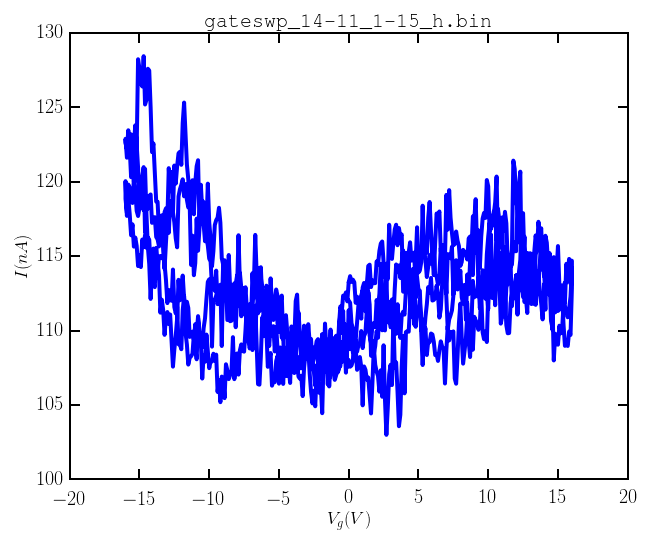

In [85]:
f = os.path.join(rt_dir, 'gateswp_14-11_1-15_h.bin')
header = lvdt.get_txt(f) # bias = 25m, top gate = 0V
df = lvdt.get_data_2d(f)

fig, ax = plt.subplots()
ax.plot(df['Gate'], df['Iavg']*1e9)
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))

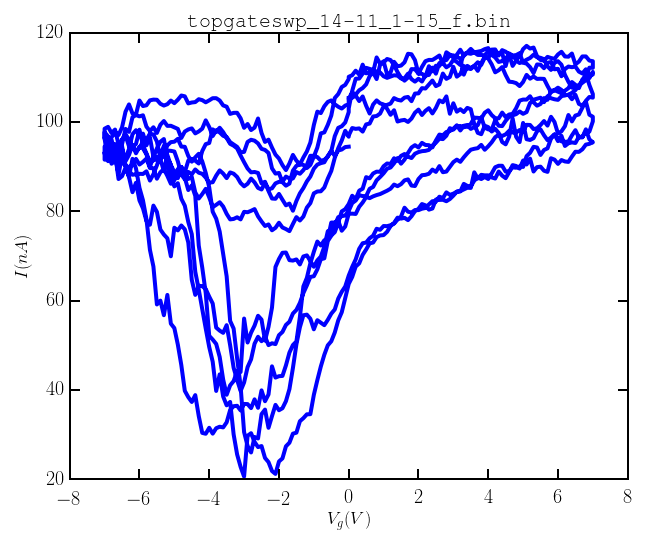

In [86]:
f = os.path.join(rt_dir, 'topgateswp_14-11_1-15_f.bin')
header = lvdt.get_txt(f) # bias = 25m, back gate = 0V
df = lvdt.get_data_2d(f)

fig, ax = plt.subplots()
ax.plot(df['Gate'], df['Iavg']*1e9)
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))

## 4K

In [87]:
for i, f in enumerate(glob.glob(os.path.join(cold_dir, '*.txt'))):
    print i, f.split('/')[-1]

0 gateswp_14-11_1-15_a.txt
1 gateswp_14-11_1-15_b.txt
2 twogateswp_14-11_1-15_a.txt


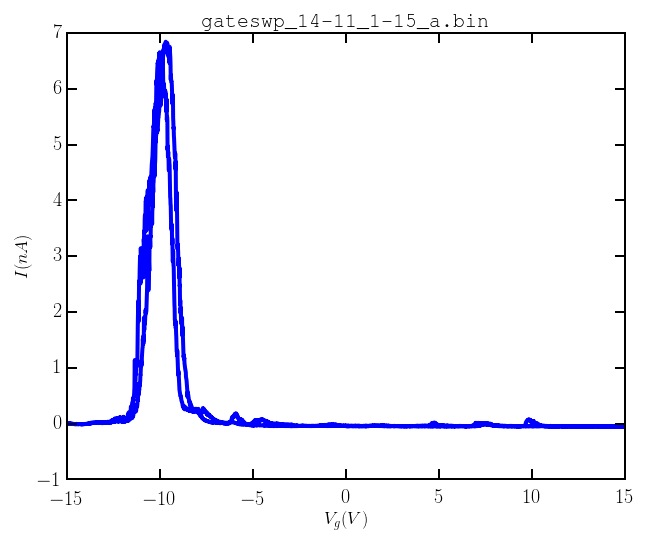

In [88]:
# fix top gate, fix bias, sweep back gate
# bias = 5m
# V_tg = 0V

f = os.path.join(cold_dir, 'gateswp_14-11_1-15_a.bin')
header = lvdt.get_txt(f) # bias = 25m, top gate = 0V
df = lvdt.get_data_2d(f)

fig, ax = plt.subplots()
ax.plot(df['Gate'], df['Iavg']*1e9)
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))

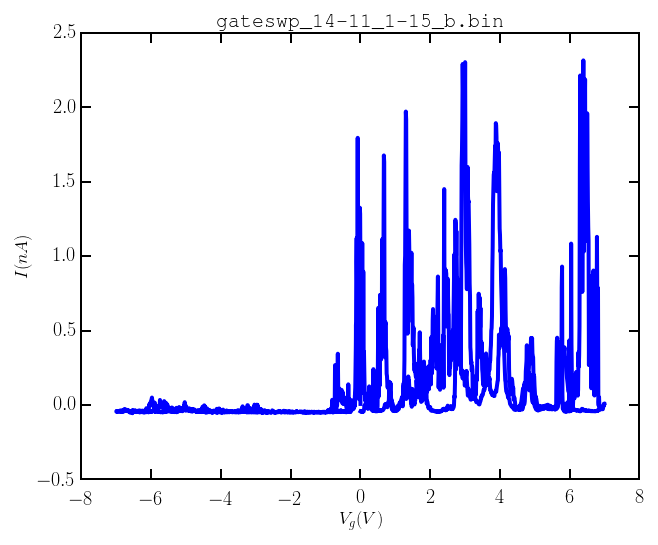

In [89]:
# fix back gate, fix bias, sweep top gate
# bias = 5m
# V_bg = 0V

f = os.path.join(cold_dir, 'gateswp_14-11_1-15_b.bin')
header = lvdt.get_txt(f) # bias = 25m, top gate = 0V
df = lvdt.get_data_2d(f)

fig, ax = plt.subplots()
ax.plot(df['Gate'], df['Iavg']*1e9)
ax.set_xlabel(r'$V_g (V)$')
ax.set_ylabel(r'$I (nA)$')
ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))

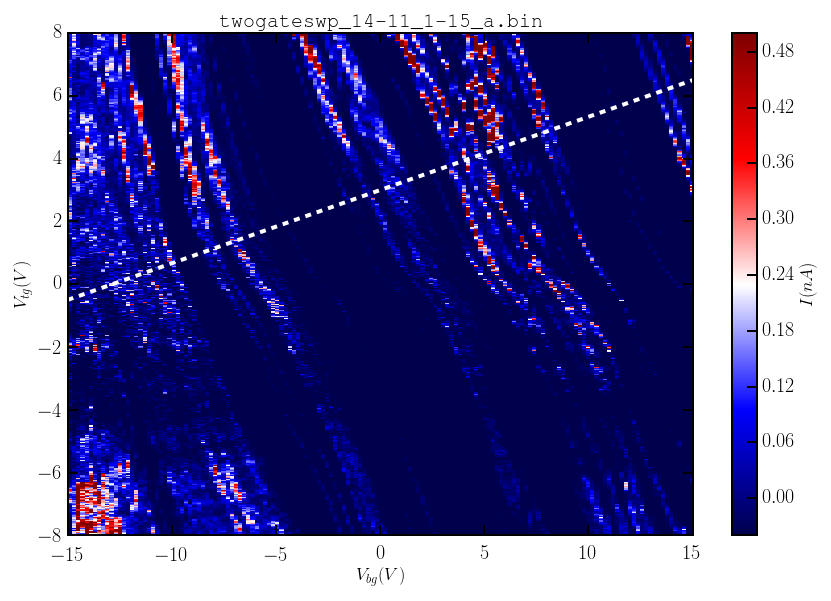

In [95]:
# fix bias, fast sweep top gate, slow sweep back gate
# bias = 5m
f = os.path.join(cold_dir,'twogateswp_14-11_1-15_a.bin')
header = lvdt.get_txt(f)
data = np.fromfile(f,'>d')
data = data.reshape((-1, data[0]))
data = data.byteswap().newbyteorder()
data = data.transpose() #20254, 20472
df = pd.DataFrame(data[1:, 1:], index=data[1:, 0], columns=data[0, 1:])
df.columns.name = 'Back'
df.index.name = 'Top'

eps = 7.0*df.columns.values/30.0 + 3 # detuning line

fig, ax = plt.subplots(figsize = (14,9))
limits = lvdt.df_extent(df)
im = ax.imshow(df*1e9, extent = limits, 
               cmap = plt.cm.seismic, vmin=-0.04, vmax = 0.5,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.plot(df.columns.values, eps, 'w--')
ax.set_xlabel(r'$V_{bg} (V)$')
ax.set_ylabel(r'$V_{tg} (V)$')
ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')

It blew up. Why the fuck did it blow up?! It was just sitting there!